# Automating Crypto Website API Pull Using Python

https://coinmarketcap.com/

In [9]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '878ec561-6e56-45d3-81e6-80b5835702ce',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-14T15:39:45.145Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 10102}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11109, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [10]:
type(data)

dict

In [11]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [12]:
#This normalizes the data and makes it all pretty in a dataframe

# pd.json_normalize(data['status'])
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11109,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971208e+07,1.971208e+07,False,NaN,1,NaN,NaN,None,2024-06-14T15:38:00.000Z,66870.074337,2.312882e+10,-33.4060,0.257635,0.130010,-5.736599,3.149392,3.417722,-1.715790,1.318148e+12,54.2506,1.404272e+12,None,2024-06-14T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:10:09.783801
1,1027,Ethereum,ETH,ethereum,9062,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201511e+08,1.201511e+08,True,NaN,2,NaN,NaN,None,2024-06-14T15:37:00.000Z,3492.352937,1.236920e+10,-24.4331,0.591122,0.791769,-7.989613,16.875896,11.133920,-4.663537,4.196101e+11,17.2677,4.196101e+11,None,2024-06-14T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:10:09.783801
2,825,Tether USDt,USDT,tether,88626,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.125594e+11,1.150845e+11,True,NaN,3,NaN,NaN,None,2024-06-14T15:37:00.000Z,0.999912,4.855154e+10,-25.2977,0.042494,0.018686,0.065277,-0.041012,-0.046813,0.017435,1.125496e+11,4.6316,1.150744e+11,None,2024-06-14T15:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-14 21:10:09.783801
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475842e+08,1.475842e+08,False,NaN,4,NaN,NaN,None,2024-06-14T15:37:00.000Z,606.082431,1.712636e+09,-15.2845,0.522668,1.051095,-13.433192,4.293358,7.379702,1.578750,8.944819e+10,3.6810,8.944819e+10,None,2024-06-14T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:10:09.783801
4,5426,Solana,SOL,solana,681,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.616579e+08,5.781673e+08,True,NaN,5,NaN,NaN,None,2024-06-14T15:37:00.000Z,145.481388,1.941395e+09,-24.5091,0.125366,-1.428828,-14.215785,-4.858233,1.293532,-24.589950,6.716264e+10,2.7639,8.411257e+10,None,2024-06-14T15:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:10:09.783801
5,3408,USDC,USDC,usd-coin,19728,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.251002e+10,3.251002e+10,False,NaN,6,NaN,NaN,None,2024-06-14T15:37:00.000Z,1.000211,5.162326e+09,-28.8331,0.027585,0.031477,0.021666,0.001994,0.036654,0.014690,3.251687e+10,1.3388,3.251687e+10,None,2024-06-14T15:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-14 21:10:09.783801
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.557046e+10,9.998753e+10,False,NaN,7,NaN,NaN,None,2024-06-14T15:38:00.000Z,0.476828,9.861778e+08,-15.2743,0.104133,-1.374162,-9.066646,-6.725346,-3.981933,-23.248202,2.649757e+10,1.0904,4.768283e+10,None,2024-06-14T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:10:09.783801
7,74,Dogecoin,DOGE,dogecoin,1005,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.447074e+11,1.447074e+11,True,NaN,8,NaN,NaN,None,2024-06-14T15:38:00.000Z,0.140687,6.226179e+08,-42.4847,0.342386,-0.602129,-12.203983,-8.249922,-8.844818,-7.614232,2.035839e+10,0.8378,2.035839e+10,None,2024-06-14T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:10:09.783801
8,11419,Toncoin,TON,toncoin,415,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.432856e+

In [13]:

def api_runner():
    #This example uses Python 2.7 and the python-request library.
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '878ec561-6e56-45d3-81e6-80b5835702ce',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
#  This is just to keep data in a dataframe 

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    #  This below append function is not working
    #  print(df2)
    #  df = df2.append(df2)
    #        OR
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])
    
    
#  This is to create a csv and append data to it

#     df = pd.json_normalize(data['data'])
#     df['timestamp'] = pd.to_datetime('now')
#     df
    
#     if not os.path.isfile(r'C:\Users\Asus\OneDrive\Desktop\Python\Crypto_API_Data\CryptoAPI.csv'):
#         df.to_csv(r'C:\Users\Asus\OneDrive\Desktop\Python\Crypto_API_Data\CryptoAPI.csv', header='column_names')
#     else:
#         df.to_csv(r'C:\Users\Asus\OneDrive\Desktop\Python\Crypto_API_Data\CryptoAPI.csv', mode='a', header=False)
        
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
    

In [14]:
import os
from time import time
from time import sleep

for i in range(26):
    api_runner()
    print('API Runner completed')
    sleep(60) # It will sleep for 1 minutes
exit()

{'status': {'timestamp': '2024-06-14T15:40:24.185Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10102}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11109, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [32]:
df69 = pd.read_csv(r'C:\Users\Asus\OneDrive\Desktop\Python\Crypto_API_Data\CryptoAPI.csv')
df69

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11108,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.971180e+07,1.971180e+07,False,NaN,1,NaN,NaN,NaN,2024-06-13T16:18:00.000Z,66706.060440,3.580642e+10,22.9997,-0.616927,-4.234168,-6.137933,8.249215,3.375977,-1.695471,1.314896e+12,54.3795,1.400827e+12,NaN,2024-06-13T16:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-13 21:50:44.862479
1,1,1027,Ethereum,ETH,ethereum,9061,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201526e+08,1.201526e+08,True,NaN,2,NaN,NaN,NaN,2024-06-13T16:18:00.000Z,3457.798737,1.712191e+10,10.6494,-0.985868,-4.419308,-10.053242,19.550336,12.328314,-5.947028,4.154635e+11,17.1630,4.154635e+11,NaN,2024-06-13T16:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-13 21:50:44.862479
2,2,825,Tether USDt,USDT,tether,88518,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.125440e+11,1.150853e+11,True,NaN,3,NaN,NaN,NaN,2024-06-13T16:18:00.000Z,0.999711,6.689650e+10,9.7732,-0.019758,-0.038288,0.004232,0.024292,-0.058830,0.015898,1.125115e+11,4.6531,1.150520e+11,NaN,2024-06-13T16:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-13 21:50:44.862479
3,3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475843e+08,1.475843e+08,False,NaN,4,NaN,NaN,NaN,2024-06-13T16:18:00.000Z,599.605044,2.057145e+09,-5.0902,-0.816354,-4.795376,-14.534795,5.434363,8.302601,1.049331,8.849227e+10,3.6558,8.849227e+10,NaN,2024-06-13T16:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-13 21:50:44.862479
4,4,5426,Solana,SOL,solana,681,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.615444e+08,5.780089e+08,True,NaN,5,NaN,NaN,NaN,2024-06-13T16:18:00.000Z,147.534979,2.644028e+09,3.9291,-0.740054,-7.285367,-14.630228,3.780614,5.515118,-17.943444,6.809394e+10,2.8137,8.527654e+10,NaN,2024-06-13T16:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-13 21:50:44.862479
5,5,3408,USDC,USDC,usd-coin,19717,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.257305e+10,3.257305e+10,False,NaN,6,NaN,NaN,NaN,2024-06-13T16:18:00.000Z,0.999953,7.454426e+09,33.8561,-0.018432,-0.009265,-0.003821,-0.005131,0.003706,0.014035,3.257153e+10,1.3456,3.257153e+10,NaN,2024-06-13T16:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-13 21:50:44.862479
6,6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.550616e+10,9.998755e+10,False,NaN,7,NaN,NaN,NaN,2024-06-13T16:19:00.000Z,0.481699,1.196158e+09,2.6790,-0.651653,-3.182370,-8.590704,-4.665610,-2.096075,-22.525705,2.673724e+10,1.1048,4.816986e+10,NaN,2024-06-13T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-13 21:50:44.862479
7,7,74,Dogecoin,DOGE,dogecoin,1005,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.446942e+11,1.446942e+11,True,NaN,8,NaN,NaN,NaN,2024-06-13T16:19:00.000Z,0.141814,1.090777e+09,-7.3777,-0.940899,-5.415879,-12.848713,-3.608298,-7.690112,-12.030097,2.051961e+10,0.8479,2.051961e+10,NaN,2024-06-13T16:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-13 21:50:44.862479
8,8,11419,Toncoin,TON,toncoin,396,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd..

In [15]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11109,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19712075.00000,19712075.00000,False,NaN,1,NaN,NaN,None,2024-06-14T15:40:00.000Z,66822.46252,23075962286.92788,-33.65090,0.08075,0.23078,-5.81308,3.15046,3.47254,-1.86989,1317209392925.75122,54.21200,1403271712969.87988,None,2024-06-14T15:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:11:24.613244
1,1027,Ethereum,ETH,ethereum,9062,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120151113.78671,120151113.78671,True,NaN,2,NaN,NaN,None,2024-06-14T15:39:00.000Z,3485.09636,12325919727.93760,-24.88170,0.30445,0.79270,-8.16092,16.88062,10.69988,-4.74194,418738209646.11292,17.23190,418738209646.10999,None,2024-06-14T15:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:11:24.613244
2,825,Tether USDt,USDT,tether,88626,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112559449770.64630,115084537326.51164,True,NaN,3,NaN,NaN,None,2024-06-14T15:39:00.000Z,0.99960,48434763192.29299,-25.59650,0.01474,-0.02255,0.02702,-0.06790,-0.09831,-0.02580,112514529871.26927,4.63020,115038609722.50000,None,2024-06-14T15:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-14 21:11:24.613244
3,1839,BNB,BNB,bnb,2181,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147584206.20557,147584206.20557,False,NaN,4,NaN,NaN,None,2024-06-14T15:39:00.000Z,605.78314,1712067472.76792,-15.39840,0.45811,1.07545,-13.44414,4.28881,7.31560,1.59737,89404024008.47527,3.67910,89404024008.48000,None,2024-06-14T15:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:11:24.613244
4,5426,Solana,SOL,solana,681,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,461657947.97759,578167252.18630,True,NaN,5,NaN,NaN,None,2024-06-14T15:39:00.000Z,145.37760,1935192925.38038,-24.89180,0.05423,-1.41029,-14.26024,-4.86267,1.30293,-24.60356,67114722789.88923,2.76190,84052565382.37000,None,2024-06-14T15:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:11:24.613244
5,3408,USDC,USDC,usd-coin,19728,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32510020431.68098,32510020431.68098,False,NaN,6,NaN,NaN,None,2024-06-14T15:39:00.000Z,1.00005,5150671594.21640,-29.03900,0.01411,-0.00209,0.00454,-0.00744,-0.00358,-0.01195,32511573826.37331,1.33860,32511573826.37000,None,2024-06-14T15:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-14 21:11:24.613244
6,52,XRP,XRP,xrp,1340,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55570463728.00000,99987531962.00000,False,NaN,7,NaN,NaN,None,2024-06-14T15:40:00.000Z,0.47632,984954182.21845,-15.42990,-0.11151,-1.27377,-9.13997,-6.84547,-3.98124,-23.18736,26469270002.15031,1.08930,47631904120.34000,None,2024-06-14T15:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-14 21:11:24.613244
7,74,Dogecoin,DOGE,dogecoin,1005,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144707446383.70523,144707446383.70523,True,NaN,8,NaN,NaN,None,2024-06-14T15:40:00.000Z,0.14048,618633566.44221,-42.96420,0.06408,-0.51098,-12.23149,-8.10571,-8.86425,-7.32990,20328251411.71368,0.83650,20328251411.71000,None,2024-06-14T15:40:00.000Z,

In [17]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08075,0.23078,-5.81308,3.15046,3.47254,-1.86989
Ethereum,0.30445,0.79270,-8.16092,16.88062,10.69988,-4.74194
Tether USDt,0.01474,-0.02255,0.02702,-0.06790,-0.09831,-0.02580
BNB,0.45811,1.07545,-13.44414,4.28881,7.31560,1.59737
Solana,0.05423,-1.41029,-14.26024,-4.86267,1.30293,-24.60356
USDC,0.01411,-0.00209,0.00454,-0.00744,-0.00358,-0.01195
XRP,-0.11151,-1.27377,-9.13997,-6.84547,-3.98124,-23.18736
Dogecoin,0.06408,-0.51098,-12.23149,-8.10571,-8.86425,-7.32990
Toncoin,0.76108,6.62953,5.99116,14.17313,16.93177,117.62503


In [18]:
# Here we are inter-changing the columns_names in index_names for further visualization purpose of trends of crypto over the time
df4 = df3.transpose()
df4

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,Toncoin,Cardano,Shiba Inu,Avalanche,TRON,Polkadot,Chainlink
quote.USD.percent_change_1h,0.08075,0.30445,0.01474,0.45811,0.05423,0.01411,-0.11151,0.06408,0.76108,0.32092,1.08976,0.79463,0.39871,0.55110,1.14295
quote.USD.percent_change_24h,0.23078,0.79270,-0.02255,1.07545,-1.41029,-0.00209,-1.27377,-0.51098,6.62953,-1.65715,0.19478,-1.42595,0.01997,-2.16239,0.61080
quote.USD.percent_change_7d,-5.81308,-8.16092,0.02702,-13.44414,-14.26024,0.00454,-9.13997,-12.23149,5.99116,-13.28001,-15.03672,-14.00159,1.40446,-12.85597,-12.73677
quote.USD.percent_change_30d,3.15046,16.88062,-0.06790,4.28881,-4.86267,-0.00744,-6.84547,-8.10571,14.17313,-6.59263,-11.55657,-9.10490,-7.54293,-9.12626,12.47184
quote.USD.percent_change_60d,3.47254,10.69988,-0.09831,7.31560,1.30293,-0.00358,-3.98124,-8.86425,16.93177,-10.63636,-4.33741,-15.56549,3.81314,-8.22212,9.30304
quote.USD.percent_change_90d,-1.86989,-4.74194,-0.02580,1.59737,-24.60356,-0.01195,-23.18736,-7.32990,117.62503,-40.32249,-21.53957,-45.33175,-7.65421,-38.45400,-18.71824


In [21]:
# Here we are changing the index column values 
df4.rename(index={'quote.USD.percent_change_1h':'1h',
                  'quote.USD.percent_change_24h':'24h',
                  'quote.USD.percent_change_7d':'7d',
                  'quote.USD.percent_change_30d':'30d',
                  'quote.USD.percent_change_60d':'60d',
                  'quote.USD.percent_change_90d':'90d'}, inplace=True)
df4

name,Bitcoin,Ethereum,Tether USDt,BNB,Solana,USDC,XRP,Dogecoin,Toncoin,Cardano,Shiba Inu,Avalanche,TRON,Polkadot,Chainlink
1h,0.08075,0.30445,0.01474,0.45811,0.05423,0.01411,-0.11151,0.06408,0.76108,0.32092,1.08976,0.79463,0.39871,0.55110,1.14295
24h,0.23078,0.79270,-0.02255,1.07545,-1.41029,-0.00209,-1.27377,-0.51098,6.62953,-1.65715,0.19478,-1.42595,0.01997,-2.16239,0.61080
7d,-5.81308,-8.16092,0.02702,-13.44414,-14.26024,0.00454,-9.13997,-12.23149,5.99116,-13.28001,-15.03672,-14.00159,1.40446,-12.85597,-12.73677
30d,3.15046,16.88062,-0.06790,4.28881,-4.86267,-0.00744,-6.84547,-8.10571,14.17313,-6.59263,-11.55657,-9.10490,-7.54293,-9.12626,12.47184
60d,3.47254,10.69988,-0.09831,7.31560,1.30293,-0.00358,-3.98124,-8.86425,16.93177,-10.63636,-4.33741,-15.56549,3.81314,-8.22212,9.30304
90d,-1.86989,-4.74194,-0.02580,1.59737,-24.60356,-0.01195,-23.18736,-7.32990,117.62503,-40.32249,-21.53957,-45.33175,-7.65421,-38.45400,-18.71824


<Axes: >

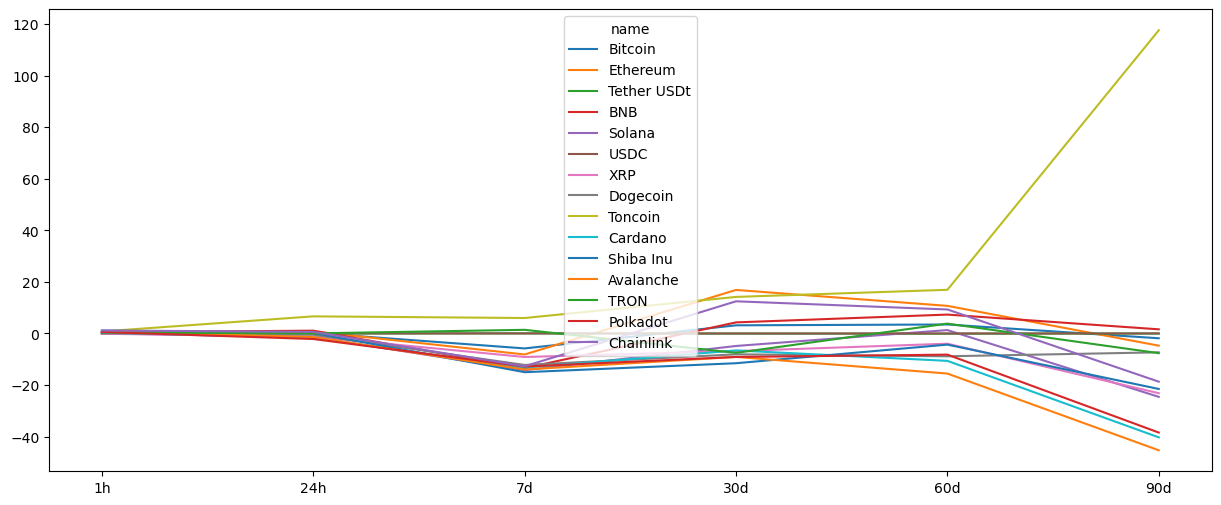

In [22]:
# Now we are visualizing how much the coin or crpto trends over time 

import matplotlib.pyplot as plt

#This is for setting up the size of the graph
plt.rcParams['figure.figsize'] = (15, 6)

df4.plot()

In [23]:
# Here we are also trying to convert the conlumns in rows format by stacking it for further visualization purpose.
df5 = df3.stack()
df5

name                                   
Bitcoin    quote.USD.percent_change_1h      0.08075
           quote.USD.percent_change_24h     0.23078
           quote.USD.percent_change_7d     -5.81308
           quote.USD.percent_change_30d     3.15046
           quote.USD.percent_change_60d     3.47254
                                             ...   
Chainlink  quote.USD.percent_change_24h     0.61080
           quote.USD.percent_change_7d    -12.73677
           quote.USD.percent_change_30d    12.47184
           quote.USD.percent_change_60d     9.30304
           quote.USD.percent_change_90d   -18.71824
Length: 90, dtype: float64

In [24]:
# By this we get to know that df5 dataframe is now a series not a dataframe anymore.
type(df5)

pandas.core.series.Series

In [25]:
# Now we will convert this series into dataframe again

df6 = df5.to_frame(name='values')
df6

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.08075
          quote.USD.percent_change_24h   0.23078
          quote.USD.percent_change_7d   -5.81308
          quote.USD.percent_change_30d   3.15046
          quote.USD.percent_change_60d   3.47254
...                                          ...
Chainlink quote.USD.percent_change_24h   0.61080
          quote.USD.percent_change_7d  -12.73677
          quote.USD.percent_change_30d  12.47184
          quote.USD.percent_change_60d   9.30304
          quote.USD.percent_change_90d -18.71824

[90 rows x 1 columns]

In [26]:
type(df6)

pandas.core.frame.DataFrame

In [27]:
df6.count()

values    90
dtype: int64

In [28]:
# This is basically for setting up the indexing in the dataframe
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08075
1,Bitcoin,quote.USD.percent_change_24h,0.23078
2,Bitcoin,quote.USD.percent_change_7d,-5.81308
3,Bitcoin,quote.USD.percent_change_30d,3.15046
4,Bitcoin,quote.USD.percent_change_60d,3.47254
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.61080
86,Chainlink,quote.USD.percent_change_7d,-12.73677
87,Chainlink,quote.USD.percent_change_30d,12.47184
88,Chainlink,quote.USD.percent_change_60d,9.30304


In [29]:
# This is for renaming the level_1 column name
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08075
1,Bitcoin,quote.USD.percent_change_24h,0.23078
2,Bitcoin,quote.USD.percent_change_7d,-5.81308
3,Bitcoin,quote.USD.percent_change_30d,3.15046
4,Bitcoin,quote.USD.percent_change_60d,3.47254
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.61080
86,Chainlink,quote.USD.percent_change_7d,-12.73677
87,Chainlink,quote.USD.percent_change_30d,12.47184
88,Chainlink,quote.USD.percent_change_60d,9.30304


In [30]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.08075
1,Bitcoin,24h,0.23078
2,Bitcoin,7d,-5.81308
3,Bitcoin,30d,3.15046
4,Bitcoin,60d,3.47254
...,...,...,...
85,Chainlink,24h,0.61080
86,Chainlink,7d,-12.73677
87,Chainlink,30d,12.47184
88,Chainlink,60d,9.30304


In [31]:
# From here we are going to start visualizing the data

import seaborn as sns
import matplotlib.pyplot as plt

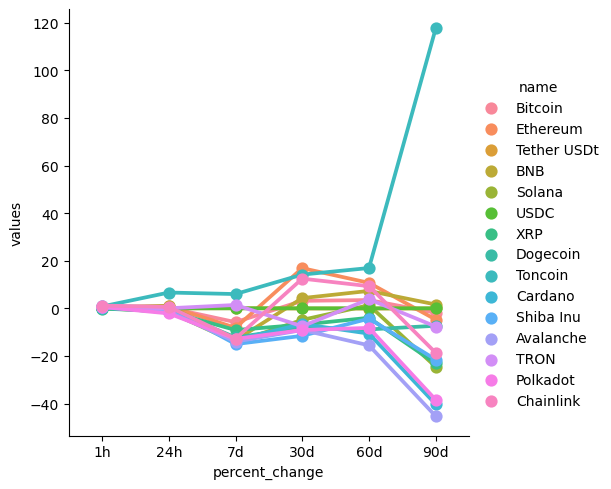

In [32]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [33]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,66822.46252,2024-06-14 21:11:24.613244
0,Bitcoin,66822.46252,2024-06-14 21:11:24.613244


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

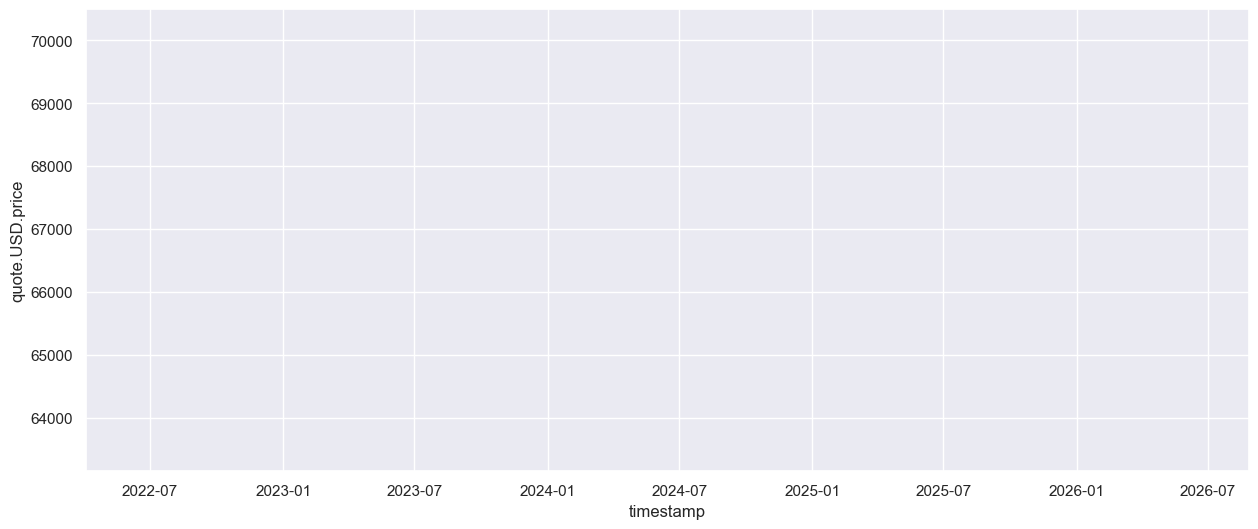

In [34]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)